In [59]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.neighbors import LocalOutlierFactor

Step 1: Read the data

In [2]:
D=pd.read_csv("/content/pulse.csv")
D.columns

Index(['Active', 'Rest', 'Smoke', 'Sex', 'Exercise', 'Hgt', 'Wgt'], dtype='object')

Step 2: View Stats of numerical measures

In [102]:
D[['Hgt','Wgt']].describe()

,Hgt,Wgt
count,232.000000,232.000000
mean,68.245690,157.918103
std,3.738761,31.832587
min,60.000000,102.000000
25%,65.000000,135.000000
50%,68.000000,150.000000
75%,71.000000,175.000000
max,78.000000,260.000000


Viz 1: Scatterplot: It can be seen women are lighter and shorter than men in this sample. However, the relationship between weight and height is almost linear and similar for both sexes.

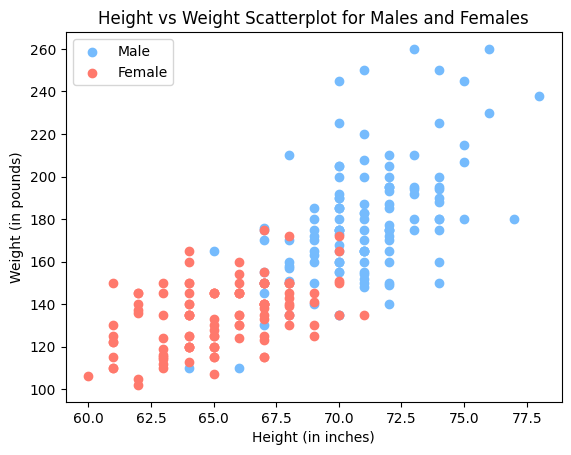

In [57]:
p1=plt.scatter(D.loc[D.Sex==0,"Hgt"],D.loc[D.Sex==0,"Wgt"],c='xkcd:sky blue')
p2=plt.scatter(D.loc[D.Sex==1,"Hgt"],D.loc[D.Sex==1,"Wgt"],c='xkcd:salmon')
plt.legend((p1,p2),('Male','Female'))
plt.title('Height vs Weight Scatterplot for Males and Females')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.show()

In [103]:
Male=D.loc[D.Sex==0,['Hgt','Wgt','Sex']]
Female=D.loc[D.Sex==1,['Hgt','Wgt','Sex']]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


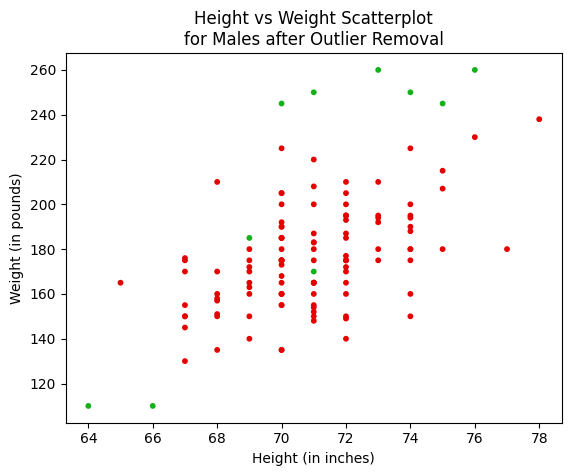

In [96]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(Male)

y_pred1=lof.predict(Male)
y_pred1
plt.scatter(Male.Hgt,Male.Wgt,
            s=10, c=['xkcd:red' if m==1 else 'xkcd:green' for m in y_pred1])
plt.title('Height vs Weight Scatterplot\nfor Males after Outlier Removal')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


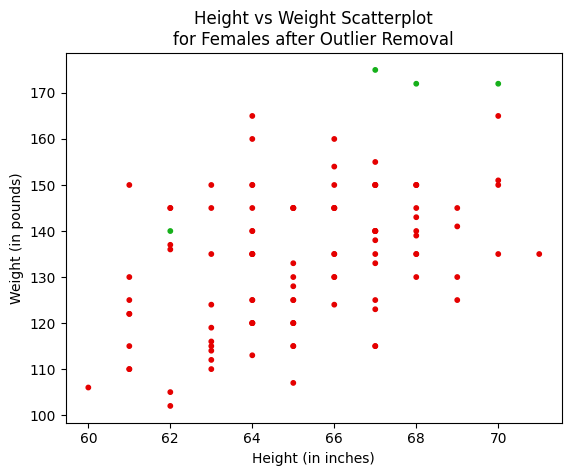

In [97]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(Female)

y_pred2=lof.predict(Female)
y_pred2
plt.scatter(Female.Hgt,Female.Wgt,
            s=10, c=['xkcd:red' if m==1 else 'xkcd:green' for m in y_pred2])
plt.title('Height vs Weight Scatterplot\nfor Females after Outlier Removal')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.show()

In [79]:
Male_N=Male.loc[y_pred1==1,:]
Female_N=Female.loc[y_pred2==1,:]

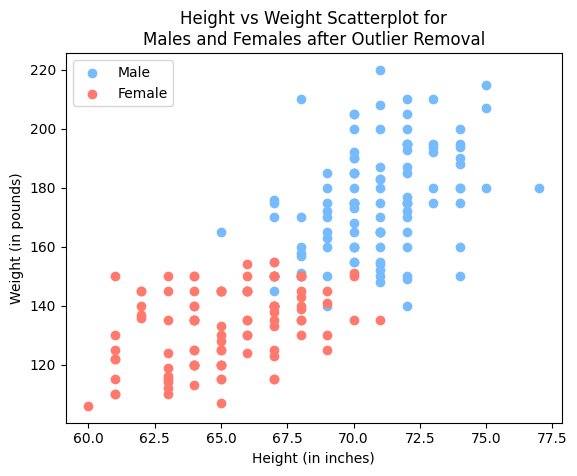

In [95]:
p1=plt.scatter(Male_N.Hgt,Male_N.Wgt,c='xkcd:sky blue')
p2=plt.scatter(Female_N.Hgt,Female_N.Wgt,c='xkcd:salmon')
plt.legend((p1,p2),('Male','Female'))
plt.title('Height vs Weight Scatterplot for\nMales and Females after Outlier Removal')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.show()

In [82]:
Combined=pd.concat([Male_N,Female_N],axis='rows')

Silhouette Score:
* 0.71-1->A strong structure is found;
* 0.51-0.7->A reasonable structure is found;
* 0.26-0.50-> Structure may be artificial;
* <0.26 -> No substantial structure found.

In [68]:
K1=KMeans(n_clusters=2,n_init='auto').fit(Combined[['Hgt','Wgt']])
print('kmeans',silhouette_score(Combined,K1.labels_))
print(confusion_matrix(Combined.Sex,K1.labels_))

K2 = AgglomerativeClustering(linkage='ward',n_clusters=2).fit(Combined[['Hgt','Wgt']])
print('ward',silhouette_score(Combined,K2.labels_))
print(confusion_matrix(Combined.Sex,K2.labels_))

K3 = AgglomerativeClustering(linkage='complete',n_clusters=2).fit(Combined[['Hgt','Wgt']])
print('complete',silhouette_score(Combined,K3.labels_))
print(confusion_matrix(Combined.Sex,K3.labels_))

K4 = AgglomerativeClustering(linkage='single',n_clusters=2).fit(Combined[['Hgt','Wgt']])
print('single',silhouette_score(Combined,K4.labels_))
print(confusion_matrix(Combined.Sex,K4.labels_))

kmeans 0.6069884688220704
[[ 77  29]
 [  0 101]]
ward 0.6069884688220704
[[ 29  77]
 [101   0]]
complete 0.5985881785350576
[[ 87  19]
 [  0 101]]
single 0.42740911131280146
[[105   1]
 [101   0]]


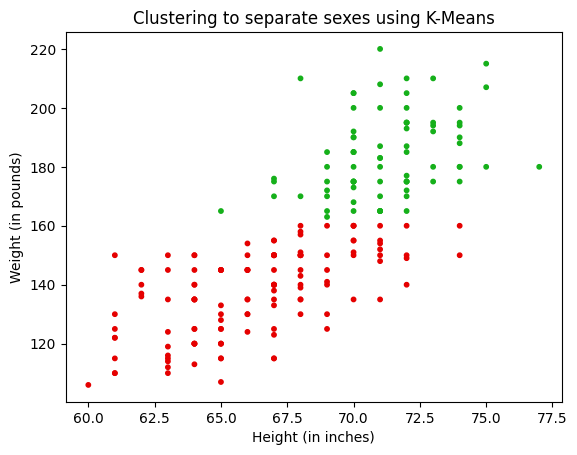

In [100]:
plt.scatter(Combined.Hgt,Combined.Wgt,
            s=10, c=['xkcd:red' if m==1 else 'xkcd:green' for m in K1.labels_])
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.title('Clustering to separate sexes using K-Means')
plt.show()

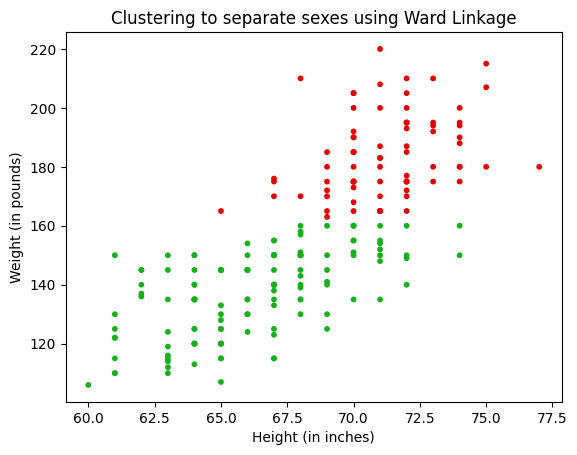

In [101]:
plt.scatter(Combined.Hgt,Combined.Wgt,
            s=10, c=['xkcd:red' if m==1 else 'xkcd:green' for m in K2.labels_])
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.title('Clustering to separate sexes using Ward Linkage')
plt.show()